# Assignment 2 - Machine Learning Basics

## Lidia Azucena Morales Vasquez
Netid:  lm348

Github link: https://gitlab.oit.duke.edu/ids705-sp19/lidiaazucenamoralesvasquez

## Learning Objectives:
1. Be able to apply basic regression and classification supervised learning techniques to data and evaluate the performance of those methods
2. Understand the bias-variance tradeoff and how adjusting model flexibility impacts model selection and the training process

# Conceptual Questions

## 1
**[5 points]**
For each part (a) through (d), indicate whether we would generally expect the performance of a flexible statistical learning method to be better or worse than an inflexible method. Justify your answer.

1. The sample size $n$ is extremely large, and the number of predictors $p$ is small.
2. The number of predictors $p$ is extremely large, and the number of observations $n$ is small.
3. The relationship between the predictors and response is highly non-linear.
4. The variance of the error terms, i.e. $\sigma^2 = Var(\epsilon)$, is extremely high

**ANSWER**

For all of these answers it also depends in the distribution of the data, whether a more flexible method is needed in the first place or not.

1.1 If the underlying distribution is more complicated, we expect the performance of a flexible statistical learning method to be **better** than an inflexible method. The large sample size would prevent for having an overfitting in the model. 

1.2 We expect the performance of a flexible statistical learning method to be **worse** than an inflexible method. The small sample size would be overfitted by the flexible method. In this case since we only have a small number of observations, we also know that parametric methods will tend to outperform non-parametric ones. Both will suffer from a curse of dimensionality.

1.3 A flexible statistical learning method would perform **better**, since they can fit different possible functional forms for f. It would also depend in the size of the sample. 

1.4 A flexible statistical learning method would perform **worse**, since it would be following the errors more closely. Instead a inflexible method would generalize more, thus preventing from following the errors.

## 2
**[5 points]** For each of the following, (i) explain if each scenario is a classification or regression problem, (ii) indicate whether we are most interested in inference or prediction for that problem, and (iii) provide the sample size $n$ and number of predictors $p$ indicated for each scenario.

**(a)** We collect a set of data on the top 500 firms in the US. For each firm we record profit, number of employees, industry and the CEO salary. We are interested in understanding which factors affect CEO salary.

(i) Regression
(ii) Inference
(iii) n = 500, p = 4

**(b)** We are considering launching a new product and wish to know whether it will be a success or a failure. We collect data on 20 similar products that were previously launched. For each product we have recorded whether it was a success or failure, price charged for the product, marketing budget, competition price, and ten other variables.

(i) Classification
(ii) Prediction
(iii) n = 20, p = 13

**(c)** We are interesting in predicting the % change in the US dollar in relation to the weekly changes in the world stock markets. Hence we collect weekly data for all of 2012. For each week we record the % change in the dollar, the % change in the US market, the % change in the British market, and the % change in the German market.

(i) Regression
(ii) Prediction
(iii) n = 52, p = 3

**ANSWER**

# Practical Questions

## 3
**[20 points] Classification I: Creating a classification algorithm**.

**(a)** Build a working version of a binary kNN classifier using the skeleton code below.

**(b)** Load the datasets to be evaluated here. Each includes training features ($\mathbf{X}$), and test features ($\mathbf{y}$) for both a low dimensional ($p = 2$ features/predictors) and a high dimensional ($p = 100$ features/predictors). For each of these datasets there are $n=100$ observations of each. They can be found in the `data` subfolder in the `assignments` folder on github. Each file is labeled similar to `A2_X_train_low.csv`, which lets you know whether the dataset is of features, $X$, targets, $y$; training or testing; and low or high dimensions.

**(c)** Train your classifier on first the low dimensional dataset and then the high dimensional dataset with $k=5$. Evaluate the classification performance on the corresponding test data for each. Calculate the time it takes to make the predictions in each case and the overall accuracy of each set of test data predictions.

**(d)** Compare your implementation's accuracy and computation time to the scikit learn [KNeighborsClassifier](http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html) class. How do the results and speed compare?

**(e)** Some supervised learning algorithms are more computationally intensive during training than testing. What are the drawbacks of the prediction process being slow?

**ANSWER**:

In [1]:
# a)  Build a working version of a binary kNN classifier
import pandas as pd
import numpy as np

class Knn:
# k-Nearest Neighbor class object for classification training and testing
    def __init__(self):
        self.train_data = pd.DataFrame()
        self.train_label = pd.DataFrame()
        
    def fit(self, x, y):
        self.train_data = x
        self.train_label = y        
        # Save the training data to properties of this class
        
    def predict(self, x, k):
        y_hat = [] # Variable to store the estimated class label for 
        # Calculate the distance from each vector in x to the training data 
        for row_x in x.values:
            dist = [np.linalg.norm(train_row - row_x) for train_row in self.train_data.values]
            sort_index = np.argsort(np.array(dist))
            neighbors = self.train_label.loc[sort_index]
            y_hat.append(neighbors.iloc[:k].mode().iloc[0])
        
        # Return the estimated targets
        return y_hat

def accuracy(y,y_hat):
    nvalues = len(y)
    accuracy = sum(y == y_hat) / nvalues
    return accuracy

In [2]:
import pandas as pd
import time

#b) Load the datasets to be evaluated here
x_train_low = pd.read_csv("./data/A2_X_train_low.csv",header=None)
y_train_low = pd.read_csv("./data/A2_y_train_low.csv",header=None)

x_test_low = pd.read_csv("./data/A2_X_test_low.csv",header=None)
y_test_low = pd.read_csv("./data/A2_y_test_low.csv",header=None)

# Initialize KNN object
Knn_low = Knn()

# Training the model
Knn_low.fit(x_train_low, y_train_low)

# Prediction 
t1_low = time.time()
y_hat_low = Knn_low.predict(x_test_low,5)
t2_low = time.time()

time_low = t2_low - t1_low
# Accuracy
acc_low = accuracy(np.array(y_test_low.values.flat), np.array(y_hat_low).reshape(1000))

# Results
print("The time of prediction for the low dimension is:",time_low)
print("The accuracy is: ",acc_low)

# High Dimension
# Reading the data
x_train_high = pd.read_csv("./data/A2_X_train_high.csv",header=None)
y_train_high = pd.read_csv("./data/A2_y_train_high.csv",header=None)

x_test_high = pd.read_csv("./data/A2_X_test_high.csv",header=None)
y_test_high = pd.read_csv("./data/A2_y_test_high.csv",header=None)

# Initialize KNN object
Knn_high = Knn()

# Training the model
Knn_high.fit(x_train_high, y_train_high)

# Prediction
t1_high = time.time()
y_hat_high = Knn_high.predict(x_test_high,5)
t2_high = time.time()
time_high = t2_high - t1_high

# Accuracy
acc_high = accuracy(np.array(y_test_high.values.flat), np.array(y_hat_high).reshape(1000))

# Results 
print("The time of predicition for the high dimension is: ",time_high)
print("The accuracy is: ",acc_high)

The time of prediction for the low dimension is: 10.27906584739685
The accuracy is:  0.925
The time of predicition for the high dimension is:  11.240560293197632
The accuracy is:  0.993


In [35]:
#d) Compare your implementation's accuracy and computation time to the scikit learn KNeighborsClassifierclass
from sklearn.neighbors import KNeighborsClassifier

# Low dimension 
knn_scikit = KNeighborsClassifier(n_neighbors=5)
knn_scikit_fit = knn_scikit.fit(np.array(x_train_low.values),np.array(y_train_low.values.flat))

t1_low_sk = time.time()
y_hat_low_sk = knn_scikit_fit.predict(x_test_low.values) 
t2_low_sk = time.time()

time_low_sk = t2_low_sk-t1_low_sk 
acc_low_sk = accuracy(np.array(y_test_low.values.flat),np.array(y_hat_low_sk))

print("The time of prediction for the low dimension is : ",t2_low_sk-t1_low_sk)
print("Accuracy: ",acc_low_sk)
print("This is a decrease of {}% in time for the low dimension.".format(round(per_low*100,3)))

# High dimension
knn_scikit = KNeighborsClassifier(n_neighbors=5)
knn_scikit_fit = knn_scikit.fit(np.array(x_train_high.values),np.array(y_train_high.values.flat))

t1_high_sk = time.time()
y_hat_high_sk = knn_scikit_fit.predict(x_test_high.values) 
t2_high_sk = time.time()

acc_high_sk = accuracy(np.array(y_test_high.values.flat),np.array(y_hat_high_sk))
time_high_sk = t2_high_sk-t1_high_sk
print("The time of prediction for the high dimension is : ",time_high_sk)
print("Accuracy: ",acc_high_sk)
print("This is a decrease of {}% in time for the high dimension.".format(round(per_high*100,3)))
per_low = abs(time_low - time_low_sk )/ time_low 
per_high = abs(time_high - time_high_sk)/ time_high 




The time of prediction for the low dimension is :  0.003551006317138672
Accuracy:  0.925
This is a decrease of 99.964% in time for the low dimension.
The time of prediction for the high dimension is :  0.20074868202209473
Accuracy:  0.993
This is a decrease of 97.59% in time for the high dimension.


(d) Even though the accuracy is the same for both cases, low and high dimension, the time scikit method takes to predict them is lower than my own algorithm. 

(e) Some supervised learning algorithms are more computationally intensive during training than testing. What are the drawbacks of the prediction process being slow?

This is a concern, specially for high dimension data which is common for machine learning algorithm. If the process is slow for prediction, it make take a lot of time training and testing. Additionally, for tasks that requires predictions to be fast or if it is going to be used by other people, even if our model ir really accurate it won't be useful. 

## 4
**[10 points] Classification II**. The table below provides a training dataset containing six observations ($n=6$), three predictors ($p=3$), and one qualitative response variable.

*Table 1. Dataset with $n=6$ observations in $p=3$ dimensions with a categorical response, $y$*

| Obs. | $x_1$ | $x_2$ | $x_3$ | $y$   |
|------|-------|-------|-------|-------|
| **1**| 0     | 3     | 0     | Red   |
| **2**| 2     | 0     | 0     | Red   |
| **3**| 0     | 1     | 3     | Red   |
| **4**| 0     | 1     | 2     | Blue  |
| **5**| -1    | 0     | 1     | Blue  |
| **6**| 1     | 1     | 1     | Red   |

We want to use this dataset to make a prediction for $y$ when $x_1=x_2=x_3=0$ using $K$-nearest neighbors. You are given some code below to get you started.

**(a)** Compute the Euclidean distance between each observation and the test point, $x_1=x_2=x_3=0$. Present your answer in a table similar in style to Table 1 with observations 1-6 as the row headers.

**(b)** What is our prediction with $K=1$? Why?

**(c)** What is our prediction with $K=3$? Why?

**(d)** If the Bayes decision boundary (the optimal decision boundary) in this problem is highly nonlinear, then would we expect the *best* value of $K$ to be large or small? Why?

**ANSWER**:

In [135]:
# a) Compute the Euclidean distance between each observation and the test point
import numpy as np

X = np.array([[ 0, 3, 0],
              [ 2, 0, 0],
              [ 0, 1, 3],
              [ 0, 1, 2],
              [-1, 0, 1],
              [ 1, 1, 1]])
y = np.array(['r','r','r','b','b','r'])


x = [0,0,0]

dist = np.array([np.linalg.norm(X_row - x) for X_row in X])
table1 = pd.DataFrame(np.c_[X,y])
table1=table1.assign(distance=dist[:, np.newaxis])
table1.columns = ["x1","x2","x3","label","distance"]
table1.index += 1 
table1.index.names = ['Obs']
table1

,x1,x2,x3,label,distance
Obs,,,,,
1,0,3,0,r,3.000000
2,2,0,0,r,2.000000
3,0,1,3,r,3.162278
4,0,1,2,b,2.236068
5,-1,0,1,b,1.414214
6,1,1,1,r,1.732051


In [119]:
# (b) What is our prediction with  K=1
table1[table1.distance == table1.distance.min()]

,x1,x2,x3,label,distance
Obs,,,,,
5,-1,0,1,b,1.4142135623730951


The label b, since it is the closest neighbor.

In [146]:
# (b) What is our prediction with  K=1
table1[table1.distance.isin(table1.distance.nsmallest(3))]

,x1,x2,x3,label,distance
Obs,,,,,
2,2,0,0,r,2.000000
5,-1,0,1,b,1.414214
6,1,1,1,r,1.732051


In [147]:
table1[table1.distance.isin(table1.distance.nsmallest(3))].label.mode()

0    r
dtype: object

The label r, since is the most repeated in the nearest 3 neighbors. This means it has higher probabilities of belong to that class according to our trained model.

(d) If the Bayes decision boundary (the optimal decision boundary) in this problem is highly nonlinear, then would we expect the best value of  K to be large or small? Why?

We expect to be best when it is a small k, because it will tend to be more flexible and the lower it is it will overfit our data.

## 5
**[20 points] Bias-variance tradeoff I: Understanding the tradeoff**. This exercise will illustrate the impact of the bias-variance tradeoff on classifier performance by looking at classifier decision boundaries.

**(a)** Create a synthetic dataset (with both features and targets). Use the [`make_moons`](http://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_moons.html#sklearn.datasets.make_moons) module with the parameter `noise=0.35` to generate 1000 random samples.

**(b)** Scatterplot your random samples with each class in a different color

**(c)** Create 3 different data subsets by selecting 100 of the 1000 data points at random three times. For each of these 100-sample datasets, fit three k-Nearest Neighbor classifiers with: $k = \{1, 25, 50\}$. This will result in 9 combinations (3 datasets, with 3 trained classifiers).

**(d)** For each combination of dataset trained classifier, in a 3-by-3 grid, plot the decision boundary (similar in style to Figure 2.15 from *Introduction to Statistical Learning*). Each column should represent a different value of $k$ and each row should represent a different dataset.

**(e)** What do you notice about the difference between the rows and the columns. Which decision boundaries appear to best separate the two classes of data? Which decision boundaries vary the most as the data change?

**(f)** Explain the bias-variance tradeoff using the example of the plots you made in this exercise.

**ANSWER**

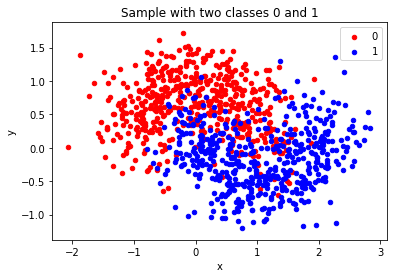

In [2]:
# b)Scatterplot your random samples with each class in a different color
from sklearn.datasets import make_moons
import matplotlib.pyplot as plt
import pandas as pd

X,label = make_moons(n_samples=1000, noise=.35)
moon_samples = pd.DataFrame(dict(x=X[:,0], y=X[:,1], label=label))
grouped = moon_samples.groupby('label')
colors = {0:'red', 1:'blue'}
fig, ax = plt.subplots()
for key, group in grouped:
    group.plot(ax=ax, kind='scatter', x='x', y='y', label=key, color=colors[key],
              title = "Sample with two classes 0 and 1")


In [4]:
# c) Create 3 different data subsets by selecting 100 of the 1000 data points at random three times
from sklearn.neighbors import KNeighborsClassifier
moon_subsets = []
for i in range(3):
    moon_subsets.append(moon_samples.sample(n=300))

knn_fit_subsets = []
for m in moon_subsets:
    for k in [1,25,50]:    
        knn_subsets = KNeighborsClassifier(n_neighbors=k)
        knn_fit_subsets.append(knn_subsets.fit(m[["x","y"]],m.label))  
        


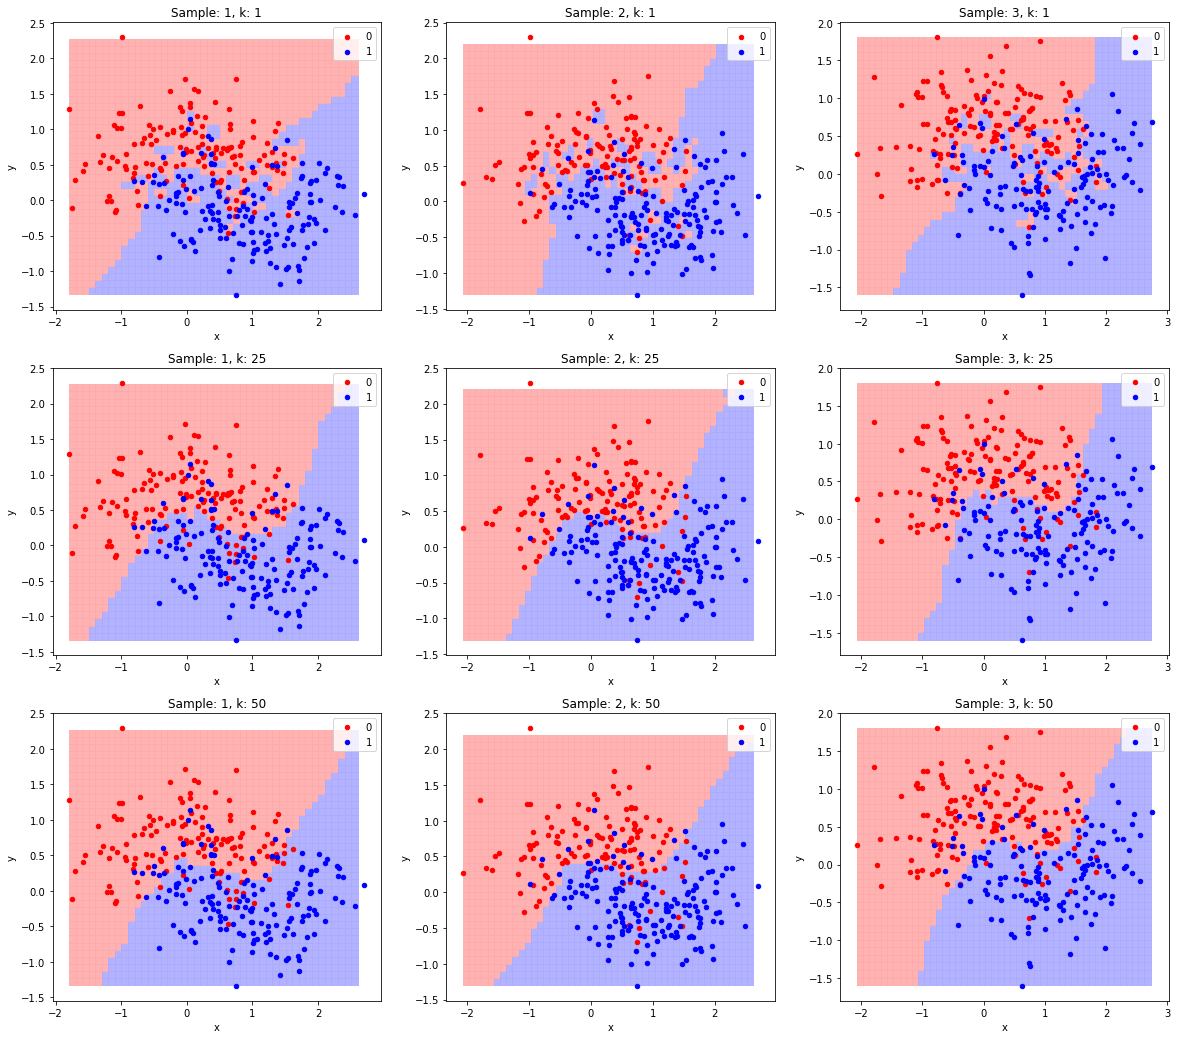

In [333]:
#d) For each combination of dataset trained classifier, 
# in a 3-by-3 grid, plot the decision boundary
from matplotlib.colors import ListedColormap

colors = {0:'red', 1:'blue'}
cmap_light = ListedColormap(['#FFAAAA', '#AAAAFF'])
fig, ax = plt.subplots(3,3,figsize=(20, 18))
j = i = l = 0
for m in moon_subsets:
    xx, yy = np.meshgrid(np.arange(m.x.min(),m.x.max(), .1),np.arange(m.y.min(), m.y.max(), .1))
    grouped = m.groupby('label')
    for k in [1,25,50]:
        Z = knn_fit_subsets[l].predict(np.c_[xx.ravel(), yy.ravel()])
        Z = Z.reshape(xx.shape)
        ax[i,j].pcolormesh(xx, yy, Z,cmap = cmap_light,alpha = .9)
        for key, group in grouped:   
            group.plot(ax=ax[i,j],kind='scatter', x='x', y='y', label=key, color=colors[key],
                      title = "Sample: {}, k: {}".format(j+1,k))
        i += 1
        l += 1
    i = 0
    j += 1

                         
plt.show()


e) What do you notice about the difference between the rows and the columns. Which decision boundaries appear to best separate the two classes of data? Which decision boundaries vary the most as the data change?

In each row the k is increasing for each sample. The lowest k, separates the data perfectly because it is classifying by the nearest point. Although, if we look at the other samples in the same row, the boundaries change drastically. This means the model has high variance. It is overfitting the data, which means it only works well for the given sample, but is not good at generalizing the pattern. The last row, when k is equal to fifty, is the decision boundary that vary the less in the three different samples, this is becasue is the less flexible model. In terms of accuracy the middle one will have a higher accuracy than the last one, and with the advantage that it has less variance than the first one. 

Explain the bias-variance tradeoff using the example of the plots you made in this exercise.

The most flexible model has low bias and high variance, the first means it has low error in terms of classification but the second means that the decision boundary changes a lot with another sample of the same population. 

The less flexible model has high bias and low variance, this means that it has a higher error at classifying but the decision boundary tends to be similar for different training sets.

We would like a model that have low bias and low variance, but as we saw in this example we cannot have one without affecting the other. The best model will balance these two.

## 6
**[20 points] Bias-variance trade-off II: Quantifying the tradeoff**. This exercise will explore the impact of the bias-variance tradeoff on classifier performance by looking at classifier decision boundaries.

Here, the value of $k$ determines how flexible our model is.

**(a)** Using the function created earlier to generate random samples (using the `make_moons` function), create a new set of 1000 random samples, and call this dataset your test set and the previously created dataset your training set.

**(b)** Train a kNN classifier on your training set for $k = 1,2,...500$. Apply each of these trained classifiers to both your training dataset and your test dataset and plot the classification error (fraction of mislabeled datapoints).

**(c)** What trend do you see in the results?

**(d)** What values of $k$ represent high bias and which represent high variance?

**(e)** What is the optimal value of $k$ and why?

**(f)** In kNN classifiers, the value of k controls the flexibility of the model - what controls the flexibility of other models?

**ANSWER**

In [5]:
from sklearn.datasets import make_moons
from sklearn.neighbors import KNeighborsClassifier
# a)
X_test,label_test = make_moons(n_samples=1000, noise=.35,random_state=1)
sample_test = pd.DataFrame(dict(x=X_test[:,0], y=X_test[:,1], label=label_test))
sample_train = moon_samples.copy()

# b)
train_error = []
test_error = []
for k in range(1,501):
    knn_k = KNeighborsClassifier(n_neighbors=k)
    # Training
    knn_k_fit = knn_k.fit(sample_train[["x","y"]],sample_train.label)
    # Error
    train_error.append(1 - knn_k_fit.score(sample_train[["x","y"]], sample_train.label))
    test_error.append(1 - knn_k_fit.score(sample_test[["x","y"]], sample_test.label))



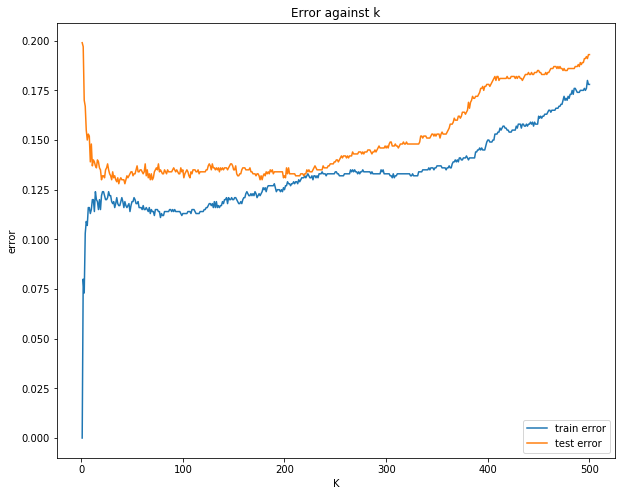

In [10]:
plt.figure(figsize=(10,8))
plt.plot(range(1,501),train_error)
plt.plot(range(1,501),test_error)
plt.xlabel("K")
plt.ylabel("error")
plt.legend(["train error","test error"])
plt.title("Error against k")
plt.show()

(c) What trend do you see in the results?

As k increases the error also increases for both datasets. We can also see that for low values of k, the error for the training set is low and high for the test data set. Another observation is that the error fro the training set is always below the test set.

(d) What values of  k represent high bias and which represent high variance?

Low bias happens at low values of k, at the left side of the plot. The error of the training reaches its minimum. If we compare it with the test dataset the difference is higher, which means high variance.

High bias happens at high values of k, at the right side of the plot. The error of the training tends to increase as k increases. If we compare it with the test dataset the difference is lower, which means low variance.

(f) In kNN classifiers, the value of k controls the flexibility of the model - what controls the flexibility of other models?

The parameters controls the flexibility. In general having more number of parameters is because there is a more complex model.  

## 7
**[20 points] Linear regression and nonlinear transformations**. You're given a dataset below that is partitioned into a training and testing dataset. Your goal is to develop a regression algorithm from the training data that performs well on the test data.

*Hint: Use the scikit learn [LinearRegression](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html) module.*

**(a)** Create a scatter plot of your training data.

**(b)** Estimate a linear regression model ($y = a_0 + a_1 x$) for the training data and calculate both the $R^2$ value and mean square error for the fit of that model for the training data. Also provide the equation representing the estimated model (e.g. $y = a_0 + a_1 x$, but with the estimated coefficients inserted.

**(c)** A linear model does not mean that non-linear relationships cannot be explored. From looking at the scatter plot of the training data, choose a transformation of the predictor variable, $x$ that may make sense for these data. This will be a multiple regression model of the form $y = a_0 + a_1 x_1 + a_2 x_2 + \ldots + a_n x_n$. Here $x_i$ could be any transformations of x - perhaps it's $\frac{1}{x}$, $log(x)$, $sin(x)$, $x^k$ (where $k$ is any power of your choosing). Provide the estimated equation for this multiple regression model (e.g. if you chose your predictors to be $x_1 = x$ and $x_2 = log(x)$, your model would be of the form $y = a_0 + a_1 x + a_2 log(x)$. Also provide the $R^2$ and mean square error of the fit for the training data.

**(d)** Using both of the models you created here in (b) and (c), plot the original data (as a scatter plot) and the two curves representing your models (each as a separate line).

**(e)** Using the models above, apply them to the test data and estimate the $R^2$ and mean square error of the test dataset.

**(f)** Which models perform better on the training data, and which on the test data? Why?

**(g)** Imagine that the test data were significantly different from the training dataset. How might this affect the predictive capability of your model? Why?

In [11]:
x_train = [3.19,9.26,9.38,8.77,7.91,3.79,3.18,7.61,2.36,6.26,6.62,1.53,6.25,7.93,7.07,4.58,4.14,2.14,9.04,4.56,3.99,6.71,2.51,0.84,6.13,5.22,0.25,3.60,1.36,5.59,4.81,1.14,0.36,2.31,1.37,5.86,4.23,9.48,2.26,0.77,4.33]
y_train = [46.40,172.16,209.00,203.31,82.88,62.57,14.38,177.00,8.01,82.35,84.84,-5.59,54.96,167.17,83.09,-21.63,94.64,63.97,106.57,38.99,88.26,66.99,-11.12,-0.44,65.08,61.47,-0.61,23.85,10.55,83.69,54.35,51.82,-18.63,1.98,4.90,55.44,50.09,155.66,45.57,18.12,30.58]

x_test = [5.65,0.07,8.84,5.14,6.65,1.35,5.45,7.39,3.35]
y_test = [98.52,16.09,198.45,75.90,85.11,47.64,14.76,141.03,-39.13]

**ANSWER**

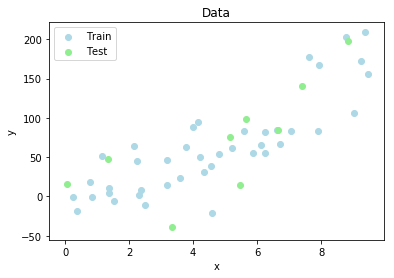

In [12]:
#(a) Create a scatter plot of your training data.
import matplotlib.pyplot as plt

plt.scatter(x_train,y_train,c="lightblue")
plt.scatter(x_test,y_test,c="lightgreen")
plt.legend(("Train","Test"))
plt.title("Data")
plt.xlabel("x")
plt.ylabel("y")
plt.show()

In [15]:
# (b) Estimate a linear regression model 
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

x_train_np = np.array(x_train).reshape(-1, 1)
y_train_np = np.array(y_train).reshape(-1,1)

reg = LinearRegression().fit(x_train_np, y_train_np)
y_pred_train = reg.predict(x_train_np)
mse_train = mean_squared_error(y_train_np, y_pred_train)
print("R^2: ",reg.score(x_train_np, y_train_np))
print("MSE: ",mse_train)
print("The estimated model is y = {} + {}x".format(reg.intercept_[0],reg.coef_[0][0]))

R^2:  0.7014590913812251
MSE:  1052.5853662498014
The estimated model is y = -21.73078292905422 + 18.303206847693165x


In [16]:
# (c) 
x2 = np.square(x_train_np)
X = np.hstack((x_train_np,x2))

reg_trans = LinearRegression().fit(X, y_train_np)
y_pred_train_trans = reg_trans.predict(X)
mse_train_trans = mean_squared_error(y_train_np, y_pred_train_trans)
print("R^2: ",reg_trans.score(X, y_train_np))
print("MSE: ",mse_train_trans)
print("The estimated model is y = {} + {}x + {}x^2".
      format(reg_trans.intercept_[0],reg_trans.coef_[0][0],reg_trans.coef_[0][1]))

R^2:  0.7490480719353505
MSE:  884.797759660905
The estimated model is y = 8.007337461589657 + 0.47100686043853707x + 1.8320819097372598x^2


In [17]:
# d) Plot the original data and the two curves representing your models (each as a separate line).

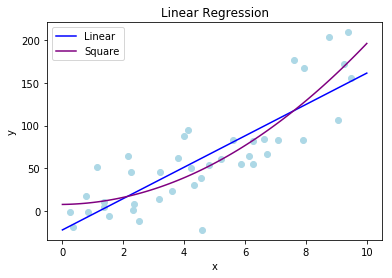

In [19]:
x_1 = np.linspace(0,10,100).reshape(-1, 1)
x_2 = np.square(x_1).reshape(-1, 1)
y_1 = reg.predict(x_1)
y_2 = reg_trans.predict(np.hstack((x_1,x_2)))

plt.title("Linear Regression")
plt.scatter(x_train,y_train,c="lightblue")
plt.plot(x_1,y_1, c = "blue")
plt.plot(x_1,y_2, c = "purple")
plt.xlabel("x")
plt.ylabel("y")
plt.legend(['Linear','Square'])
plt.show()

In [ ]:
#(e) Apply them to the test data and estimate the  R2 and mean square error of the test dataset.

In [21]:
x_test_np = np.array(x_test).reshape(-1, 1)
y_test_np = np.array(y_test).reshape(-1,1)

# First model
y_pred_test = reg.predict(x_test_np)
mse_test = mean_squared_error(y_test_np, y_pred_test)
print("For the linear model: ")
print("R^2: ",reg.score(x_test_np, y_test_np))
print("MSE: ",mse_test)

# Second Model
x2_test = np.square(x_test_np)
X_test = np.hstack((x_test_np,x2_test))

y_pred_test_trans = reg_trans.predict(X_test)
mse_test_trans = mean_squared_error(y_test_np, y_pred_test_trans)
print("For the squared model: ")
print("R^2: ",reg_trans.score(X_test, y_test_np))
print("MSE: ",mse_test_trans)

For the linear model: 
R^2:  0.5556465885794163
MSE:  2023.3121088887128
For the squared model: 
R^2:  0.6927820089560344
MSE:  1398.8817580143948


(f) Which models perform better on the training data, and which on the test data? Why?

The second model, including the square term, perform better in both cases for the two measures: r squared and mean squared error. This is because the trend is not completely linear. For this reason, the second one it is better at capturing the variance of the data than the first one. 

(g) Imagine that the test data were significantly different from the training dataset. How might this affect the predictive capability of your model? Why?

It depends on how different it is. If the trends is completely different from the training dataset, then both will underperform because our data was not representative. This means neither of them were able to capture the real distribution of our population. That being said, more flexible model will adjust more to the data we trained on, this means our second model might get worse results than the first one if the test data is significantly different.